In [5]:
from understatscraper.understatscraper import understatscraper
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
import pandas as pd

In [45]:
scraper = understatscraper("14677")
bha_cp = scraper.scrape()

In [4]:
scraper = understatscraper("14692")
bha_wba = scraper.scrape()
bha_wba.head()



,x,y,xG,result,team,minute
0,0.6969999694824218,0.5690000152587891,0.0110421571880579,MissedShots,West Bromwich Albion,9
1,0.960999984741211,0.5059999847412109,0.13626007735729218,Goal,West Bromwich Albion,10
2,0.9469999694824218,0.485,0.1525222808122635,MissedShots,West Bromwich Albion,25
3,0.7180000305175781,0.40799999237060547,0.016603725031018257,MissedShots,West Bromwich Albion,34
4,0.8490000152587891,0.4909999847412109,0.3417101204395294,SavedShot,West Bromwich Albion,48


In [6]:
scraper = understatscraper("14565")
bha_shu = scraper.scrape()
bha_shu.head()

,x,y,xG,result,team,minute
0,0.9269999694824219,0.33599998474121096,0.07969945669174194,BlockedShot,Brighton,1
1,0.8930000305175781,0.48200000762939454,0.017726989462971687,MissedShots,Brighton,10
2,0.765,0.6120000076293945,0.02091963402926922,BlockedShot,Brighton,19
3,0.8780000305175781,0.31799999237060544,0.056041136384010315,SavedShot,Brighton,22
4,0.9169999694824219,0.40799999237060547,0.385970801115036,BlockedShot,Brighton,25


In [7]:
scraper = understatscraper("14528")
bha_liv = scraper.scrape()
bha_liv.head()

,x,y,xG,result,team,minute
0,0.8130000305175781,0.539000015258789,0.3095676600933075,MissedShots,Brighton,9
1,0.885,0.5,0.7611688375473022,MissedShots,Brighton,19
2,0.88,0.3220000076293945,0.07941213995218277,BlockedShot,Brighton,25
3,0.78,0.6930000305175781,0.022846652194857597,MissedShots,Brighton,32
4,0.93,0.654000015258789,0.10049325227737427,MissedShots,Brighton,37


In [7]:
scraper = understatscraper("14106")
bha_mun = scraper.scrape()
bha_mun.head()

,x,y,xG,result,team,minute
0,0.8030000305175782,0.625,0.03697773441672325,ShotOnPost,Brighton,8
1,0.895,0.7090000152587891,0.03488842025399208,MissedShots,Brighton,8
2,0.7440000152587891,0.54,0.040683213621377945,BlockedShot,Brighton,11
3,0.8190000152587891,0.6270000076293946,0.044003840535879135,ShotOnPost,Brighton,20
4,0.885,0.33,0.032654739916324615,MissedShots,Brighton,24


In [9]:
scraper = understatscraper("14625")
bha_ful = scraper.scrape()
bha_ful.head()

,x,y,xG,result,team,minute
0,0.8859999847412109,0.46700000762939453,0.5543070435523987,SavedShot,Brighton,14
1,0.874000015258789,0.5540000152587891,0.11020658165216446,BlockedShot,Brighton,16
2,0.8959999847412109,0.5070000076293946,0.03374769166111946,SavedShot,Brighton,18
3,0.7419999694824219,0.6969999694824218,0.015625176951289177,SavedShot,Brighton,21
4,0.8090000152587891,0.47400001525878904,0.05779942497611046,BlockedShot,Brighton,21


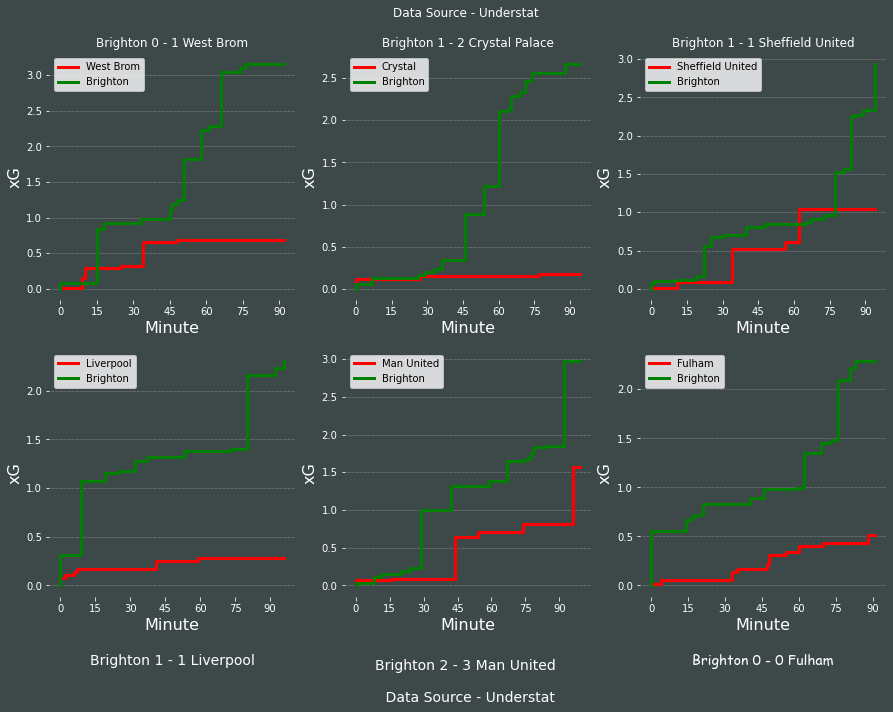

In [100]:
from understatscraper.understatscraper import understatscraper
import matplotlib.pyplot as plt
import matplotlib as mpl
scraper = understatscraper("14692")
bha_wba = scraper.scrape()
fig = plt.figure(figsize=(15,10))
#plt.se
fig.set_facecolor('#3d4849')

ax1 = fig.add_subplot(231)


#fig.add_axes()


bha_xG = [0]
other_xG = [0]
bha_min = [0]
other_min = [0]
cum_bha = [0]
cum_other=[0]
df = bha_wba
for x in range(len(bha_wba)):
    if df['team'][x]=='Brighton':
        bha_xG.append(float(df['xG'][x]))
        bha_min.append(df['minute'][x])
    if df['team'][x]!='Brighton':
        other_xG.append(float(df['xG'][x]))
        other_min.append(df['minute'][x])
        
bha_min = list(map(int, bha_min))
other_min = list(map(int, other_min))
        
for b in range(len(bha_xG)-1):
    
    
    cum_bha.append(cum_bha[b]+ bha_xG[b+1])
        #cum_other.append(cum_other[o-1] + other_xG[o])
        
for o in range(len(other_xG)-1):
    
        cum_other.append(cum_other[o] + other_xG[o+1])
        
        
if (max(bha_min) > 90) & (max(bha_min) > max(other_min)) :
    #print(max(bha_min))
    last_min = max(bha_min)
    
elif (max(other_min) > 90) & (max(other_min) > max(bha_min)) :
    #print(other_min)
    last_min = max(other_min)
    
else :
    #print(90)
    last_min = 90
    
bha_min.append(last_min)
other_min.append(last_min)
cum_bha.append(cum_bha[-1])
cum_other.append(cum_other[-1])

        
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax1.spines[x].set_visible(False)

#plt.xticks([0,15,30,45,60,75,90,120])

ax1.set_facecolor('#3d4849')
plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

ax1.step( other_min , cum_other , color = 'red' , lw = 3 , label = 'West Brom')
ax1.step( bha_min , cum_bha , color = 'green' , lw = 3 , label = 'Brighton')
ax1.tick_params(axis="x", colors="white")
ax1.tick_params(axis="y", colors="white")
#ax1.set_xticks( [0,90], minor=False)
ax1.set_xticks( [0,15,30,45,60,75,90], minor=False)

plt.legend()
plt.title("Brighton 0 - 1 West Brom" , color = 'white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)








##2nd fig
ax2 = fig.add_subplot(232)


#fig.add_axes()


bha_xG = [0]
other_xG = [0]
bha_min = [0]
other_min = [0]
cum_bha = [0]
cum_other=[0]
df = bha_cp
for x in range(len(bha_cp)):
    if df['team'][x]=='Brighton':
        bha_xG.append(float(df['xG'][x]))
        bha_min.append(df['minute'][x])
    if df['team'][x]!='Brighton':
        other_xG.append(float(df['xG'][x]))
        other_min.append(df['minute'][x])
        
bha_min = list(map(int, bha_min))
other_min = list(map(int, other_min))
        
for b in range(len(bha_xG)-1):
    
    
    cum_bha.append(cum_bha[b]+ bha_xG[b+1])
        #cum_other.append(cum_other[o-1] + other_xG[o])
        
for o in range(len(other_xG)-1):
    
        cum_other.append(cum_other[o] + other_xG[o+1])
        
        
if (max(bha_min) > 90) & (max(bha_min) > max(other_min)) :
    #print(max(bha_min))
    last_min = max(bha_min)
    
elif (max(other_min) > 90) & (max(other_min) > max(bha_min)) :
    #print(other_min)
    last_min = max(other_min)
    
else :
    #print(90)
    last_min = 90
    
bha_min.append(last_min)
other_min.append(last_min)
cum_bha.append(cum_bha[-1])
cum_other.append(cum_other[-1])

        
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax2.spines[x].set_visible(False)

#plt.xticks([0,15,30,45,60,75,90,120])

ax2.set_facecolor('#3d4849')
plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

ax2.step( other_min , cum_other , color = 'red' , lw = 3 , label = 'Crystal')
ax2.step( bha_min , cum_bha , color = 'green' , lw = 3 , label = 'Brighton')
ax2.tick_params(axis="x", colors="white")
ax2.tick_params(axis="y", colors="white")
ax2.set_xticks( [0,15,30,45,60,75,90], minor=False)

plt.legend()
plt.title("Data Source - Understat \n\nBrighton 1 - 2 Crystal Palace" , color = 'white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)




##3rd Figure
scraper = understatscraper("14565")
bha_shu = scraper.scrape()
ax3 = fig.add_subplot(233)


#fig.add_axes()


bha_xG = [0]
other_xG = [0]
bha_min = [0]
other_min = [0]
cum_bha = [0]
cum_other=[0]
df = bha_shu
for x in range(len(bha_shu)):
    if df['team'][x]=='Brighton':
        bha_xG.append(float(df['xG'][x]))
        bha_min.append(df['minute'][x])
    if df['team'][x]!='Brighton':
        other_xG.append(float(df['xG'][x]))
        other_min.append(df['minute'][x])
        
bha_min = list(map(int, bha_min))
other_min = list(map(int, other_min))
        
for b in range(len(bha_xG)-1):
    
    
    cum_bha.append(cum_bha[b]+ bha_xG[b+1])
        #cum_other.append(cum_other[o-1] + other_xG[o])
        
for o in range(len(other_xG)-1):
    
        cum_other.append(cum_other[o] + other_xG[o+1])
        
        
if (max(bha_min) > 90) & (max(bha_min) > max(other_min)) :
    #print(max(bha_min))
    last_min = max(bha_min)
    
elif (max(other_min) > 90) & (max(other_min) > max(bha_min)) :
    #print(other_min)
    last_min = max(other_min)
    
else :
    #print(90)
    last_min = 90
    
bha_min.append(last_min)
other_min.append(last_min)
cum_bha.append(cum_bha[-1])
cum_other.append(cum_other[-1])
ax = ax3
        
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

#plt.xticks([0,15,30,45,60,75,90,120])



ax.set_facecolor('#3d4849')
plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

ax.step( other_min , cum_other , color = 'red' , lw = 3 , label = 'Sheffield United')
ax.step( bha_min , cum_bha , color = 'green' , lw = 3 , label = 'Brighton')
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
ax.set_xticks( [0,15,30,45,60,75,90], minor=False)

plt.legend()
plt.title("Brighton 1 - 1 Sheffield United" , color = 'white')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)


##4th Figure
ax4 = fig.add_subplot(234)
scraper = understatscraper("14528")
bha_liv = scraper.scrape()


#fig.add_axes()


bha_xG = [0]
other_xG = [0]
bha_min = [0]
other_min = [0]
cum_bha = [0]
cum_other=[0]
df = bha_liv
for x in range(len(df)):
    if df['team'][x]=='Brighton':
        bha_xG.append(float(df['xG'][x]))
        bha_min.append(df['minute'][x])
    if df['team'][x]!='Brighton':
        other_xG.append(float(df['xG'][x]))
        other_min.append(df['minute'][x])
        
bha_min = list(map(int, bha_min))
other_min = list(map(int, other_min))
        
for b in range(len(bha_xG)-1):
    
    
    cum_bha.append(cum_bha[b]+ bha_xG[b+1])
        #cum_other.append(cum_other[o-1] + other_xG[o])
        
for o in range(len(other_xG)-1):
    
        cum_other.append(cum_other[o] + other_xG[o+1])
        
        
if (max(bha_min) > 90) & (max(bha_min) > max(other_min)) :
    #print(max(bha_min))
    last_min = max(bha_min)
    
elif (max(other_min) > 90) & (max(other_min) > max(bha_min)) :
    #print(other_min)
    last_min = max(other_min)
    
else :
    #print(90)
    last_min = 90
    
bha_min.append(last_min)
other_min.append(last_min)
cum_bha.append(cum_bha[-1])
cum_other.append(cum_other[-1])
ax = ax4
        
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

#plt.xticks([0,15,30,45,60,75,90,120])



ax.set_facecolor('#3d4849')
plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

ax.step( other_min , cum_other , color = 'red' , lw = 3 , label = 'Liverpool')
ax.step( bha_min , cum_bha , color = 'green' , lw = 3 , label = 'Brighton')
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
ax.set_xticks( [0,15,30,45,60,75,90], minor=False)

plt.legend()
#plt.title("Brighton 1 - 1 Liverpool" , color = 'white' , loc=  )
ax.set_title("Brighton 1 - 1 Liverpool", color = 'white', fontsize=14, y =-0.3)
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)









##5Th figure

ax5 = fig.add_subplot(235)
scraper = understatscraper("14106")
bha_mun = scraper.scrape()


#fig.add_axes()


bha_xG = [0]
other_xG = [0]
bha_min = [0]
other_min = [0]
cum_bha = [0]
cum_other=[0]
df = bha_mun
for x in range(len(df)):
    if df['team'][x]=='Brighton':
        bha_xG.append(float(df['xG'][x]))
        bha_min.append(df['minute'][x])
    if df['team'][x]!='Brighton':
        other_xG.append(float(df['xG'][x]))
        other_min.append(df['minute'][x])
        
bha_min = list(map(int, bha_min))
other_min = list(map(int, other_min))
        
for b in range(len(bha_xG)-1):
    
    
    cum_bha.append(cum_bha[b]+ bha_xG[b+1])
        #cum_other.append(cum_other[o-1] + other_xG[o])
        
for o in range(len(other_xG)-1):
    
        cum_other.append(cum_other[o] + other_xG[o+1])
        
        
if (max(bha_min) > 90) & (max(bha_min) > max(other_min)) :
    #print(max(bha_min))
    last_min = max(bha_min)
    
elif (max(other_min) > 90) & (max(other_min) > max(bha_min)) :
    #print(other_min)
    last_min = max(other_min)
    
else :
    #print(90)
    last_min = 90
    
bha_min.append(last_min)
other_min.append(last_min)
cum_bha.append(cum_bha[-1])
cum_other.append(cum_other[-1])
ax = ax5
        
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

#plt.xticks([0,15,30,45,60,75,90,120])



ax.set_facecolor('#3d4849')
plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

ax.step( other_min , cum_other , color = 'red' , lw = 3 , label = 'Man United')
ax.step( bha_min , cum_bha , color = 'green' , lw = 3 , label = 'Brighton')
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
ax.set_xticks( [0,15,30,45,60,75,90], minor=False)

plt.legend()
#plt.title("Brighton 1 - 1 Liverpool" , color = 'white' , loc=  )
ax.set_title("Brighton 2 - 3 Man United \n\n Data Source - Understat", color = 'white', fontsize=14, y =-0.45)
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)






##6TH figure
ax6 = fig.add_subplot(236)
scraper = understatscraper("14625")
bha_ful = scraper.scrape()
bha_ful.head()


#fig.add_axes()


bha_xG = [0]
other_xG = [0]
bha_min = [0]
other_min = [0]
cum_bha = [0]
cum_other=[0]
df = bha_ful
for x in range(len(df)):
    if df['team'][x]=='Brighton':
        bha_xG.append(float(df['xG'][x]))
        bha_min.append(df['minute'][x])
    if df['team'][x]!='Brighton':
        other_xG.append(float(df['xG'][x]))
        other_min.append(df['minute'][x])
        
bha_min = list(map(int, bha_min))
other_min = list(map(int, other_min))
        
for b in range(len(bha_xG)-1):
    
    
    cum_bha.append(cum_bha[b]+ bha_xG[b+1])
        #cum_other.append(cum_other[o-1] + other_xG[o])
        
for o in range(len(other_xG)-1):
    
        cum_other.append(cum_other[o] + other_xG[o+1])
        
        
if (max(bha_min) > 90) & (max(bha_min) > max(other_min)) :
    #print(max(bha_min))
    last_min = max(bha_min)
    
elif (max(other_min) > 90) & (max(other_min) > max(bha_min)) :
    #print(other_min)
    last_min = max(other_min)
    
else :
    #print(90)
    last_min = 90
    
bha_min.append(last_min)
other_min.append(last_min)
cum_bha.append(cum_bha[-1])
cum_other.append(cum_other[-1])
ax = ax6
        
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

#plt.xticks([0,15,30,45,60,75,90,120])



ax.set_facecolor('#3d4849')
plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

ax.step( other_min , cum_other , color = 'red' , lw = 3 , label = 'Fulham')
ax.step( bha_min , cum_bha , color = 'green' , lw = 3 , label = 'Brighton')
ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")
ax.set_xticks( [0,15,30,45,60,75,90], minor=False)

plt.legend()
#plt.title("Brighton 1 - 1 Liverpool" , color = 'white' , loc=  )
ax.set_title("Brighton 0 - 0 Fulham", fontsize = 14 , color = 'white', y =-0.3 , fontname = 'Comic Sans MS')
plt.xlabel('Minute',color='white',fontsize=16)
plt.ylabel('xG',color='white',fontsize=16)


plt.annotate('Data Source - Understat' , (0,-0.5))









plt.savefig("2brighton xGs.jpeg" ,dpi = 500)



In [37]:
max(bha_min)

92

In [38]:
max(other_min)

52

In [42]:
if (max(bha_min) > 90) & (max(bha_min) > max(other_min)) :
    #print(max(bha_min))
    last_min = max(bha_min)
    
elif (max(other_min) > 90) & (max(other_min) > max(bha_min)) :
    #print(other_min)
    last_min = max(other_min)
    
else :
    #print(90)
    last_min = 90
    
bha_min.append(last_min)
other_min.append(last_min)
bha_xG.append(bha_xG[-1])
other_xG.append(other_xG[-1])


92

In [132]:
other_min

[0, '9', '10', '25', '34', '48', '52']

In [37]:
cum_bha = [0]
for b in range(len(bha_xG)):
    if b > 0 :
        cum_bha.append(cum_bha[b-1] + bha_xG[b])
        
len(cum_bha)

25

In [42]:
cum_bha

[0,
 0.013789617456495762,
 0.06952732894569635,
 0.10467733908444643,
 0.13949186075478792,
 0.18415107298642397,
 0.28797239530831575,
 0.3299926007166505,
 0.8159714424982667,
 0.8342443415895104,
 1.1054362365975976,
 1.1586696999147534,
 1.6548784272745252,
 1.7191347749903798,
 1.8356797890737653,
 1.9101638244464993,
 2.057472978718579,
 2.081024263985455,
 2.125875902362168,
 2.232435223646462,
 2.275172737427056,
 2.306288084946573,
 2.4083912363275886,
 2.5057746013626456,
 2.6089479690417647]

In [54]:
bha_cp

,x,y,xG,result,team,minute
0,0.895,0.674000015258789,0.05615488067269325,BlockedShot,Brighton,7
1,0.7219999694824218,0.5420000076293945,0.013789617456495762,MissedShots,Brighton,7
2,0.9409999847412109,0.34400001525878904,0.05573771148920059,MissedShots,Brighton,26
3,0.8190000152587891,0.35200000762939454,0.035150010138750076,MissedShots,Brighton,29
4,0.8159999847412109,0.47200000762939454,0.03481452167034149,MissedShots,Brighton,33
5,0.8130000305175781,0.5129999923706055,0.04465921223163605,BlockedShot,Brighton,36
6,0.93,0.43900001525878907,0.10382132232189178,BlockedShot,Brighton,46
7,0.865,0.31,0.04202020540833473,MissedShots,Brighton,46
8,0.9209999847412109,0.4490000152587891,0.4859788417816162,MissedShots,Brighton,46
9,0.750999984741211,0.624000015258789,0.018272899091243744,MissedShots,Brighton,54
